## Note: Based on tutorials from __[here](https://www.kaggle.com/arunkumarramanan/data-science-in-r-and-titanic-survival-prediction/notebook)__

### Import Libraries

In [1]:
#import libraries
%matplotlib inline
import pandas as pd
import math
import matplotlib.pyplot as plt

### Import Data

!["Columns"](Columns.png)

In [2]:
training_data = pd.read_csv('train.csv')
test_data = pd.read_csv('test.csv')
full_data = training_data
full_data = full_data.append(test_data)

In [3]:
full_data.describe(include='all')

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket
count,1046.000000,295,1307,1308.000000,1309,1309.000000,1309.000000,1309.000000,1309,1309.000000,891.000000,1309
unique,NaN,186,3,NaN,1307,NaN,NaN,NaN,2,NaN,NaN,929
top,NaN,C23 C25 C27,S,NaN,"Connolly, Miss. Kate",NaN,NaN,NaN,male,NaN,NaN,CA. 2343
freq,NaN,6,914,NaN,2,NaN,NaN,NaN,843,NaN,NaN,11
mean,29.881138,NaN,NaN,33.295479,NaN,0.385027,655.000000,2.294882,NaN,0.498854,0.383838,NaN
std,14.413493,NaN,NaN,51.758668,NaN,0.865560,378.020061,0.837836,NaN,1.041658,0.486592,NaN
min,0.170000,NaN,NaN,0.000000,NaN,0.000000,1.000000,1.000000,NaN,0.000000,0.000000,NaN
25%,21.000000,NaN,NaN,7.895800,NaN,0.000000,328.000000,2.000000,NaN,0.000000,0.000000,NaN
50%,28.000000,NaN,NaN,14.454200,NaN,0.000000,655.000000,3.000000,NaN,0.000000,0.000000,NaN
75%,39.000000,NaN,NaN,31.275000,NaN,0.000000,982.000000,3.000000,NaN,1.000000,1.000000,NaN


In [4]:
full_data.columns

Index(['Age', 'Cabin', 'Embarked', 'Fare', 'Name', 'Parch', 'PassengerId',
       'Pclass', 'Sex', 'SibSp', 'Survived', 'Ticket'],
      dtype='object')

### Feature Engineering

**Extract titles from names**

In [5]:
full_data['Name'].head(10)

0                              Braund, Mr. Owen Harris
1    Cumings, Mrs. John Bradley (Florence Briggs Th...
2                               Heikkinen, Miss. Laina
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)
4                             Allen, Mr. William Henry
5                                     Moran, Mr. James
6                              McCarthy, Mr. Timothy J
7                       Palsson, Master. Gosta Leonard
8    Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)
9                  Nasser, Mrs. Nicholas (Adele Achem)
Name: Name, dtype: object

In [6]:
full_data['title'] = full_data.apply(lambda row: row['Name'].partition(", ")[2].partition(". ")[0], axis=1)
full_data['title'].value_counts()    

Mr              757
Miss            260
Mrs             197
Master           61
Dr                8
Rev               8
Col               4
Ms                2
Mlle              2
Major             2
the Countess      1
Jonkheer          1
Capt              1
Sir               1
Mme               1
Don               1
Lady              1
Dona              1
Name: title, dtype: int64

In [7]:
pd.crosstab(full_data.Sex,full_data.title)

title,Capt,Col,Don,Dona,Dr,Jonkheer,Lady,Major,Master,Miss,Mlle,Mme,Mr,Mrs,Ms,Rev,Sir,the Countess
Sex,,,,,,,,,,,,,,,,,,
female,0,0,0,1,1,0,1,0,0,260,2,1,0,197,2,0,0,1
male,1,4,1,0,7,1,0,2,61,0,0,0,757,0,0,8,1,0


In [8]:
rare_title = ['Dona', 'Jonkheer','Lady', 'Don', 'Capt', 'Sir', 'the Countess', 'Mlle', 'Major', 'Mme', 'Col', 'Ms']

In [9]:
full_data['title'].replace(rare_title, 'Rare', inplace=True)

In [10]:
pd.crosstab(full_data.Sex,full_data.title)

title,Dr,Master,Miss,Mr,Mrs,Rare,Rev
Sex,,,,,,,
female,1,0,260,0,197,8,0
male,7,61,0,757,0,10,8


**Family Size**

Let's create a variable for family size.

In [11]:
full_data['family_size'] = full_data['SibSp'] + full_data['Parch'] + 1
full_data['family_size'].value_counts()

1     790
2     235
3     159
4      43
6      25
5      22
7      16
11     11
8       8
Name: family_size, dtype: int64

Discretize the family size variable, makes it easier to perform analysis

In [12]:
full_data['family_size_range'] = full_data.apply(lambda row: 'single' if row['family_size'] == 1 else ('small' if row['family_size'] > 1 and row['family_size'] < 6 else 'large'),
                                                   axis=1)

In [13]:
full_data[['family_size_range','family_size']].apply(pd.Series.value_counts)

C:\Users\rianashwin\AppData\Local\Continuum\Anaconda3\lib\site-packages\pandas\core\indexes\api.py:77: RuntimeWarning: '<' not supported between instances of 'str' and 'int', sort order is undefined for incomparable objects
  result = result.union(other)


,family_size_range,family_size
single,790.0,NaN
small,459.0,NaN
large,60.0,NaN
1,NaN,790.0
2,NaN,235.0
3,NaN,159.0
4,NaN,43.0
6,NaN,25.0
5,NaN,22.0
7,NaN,16.0


**Cabin class**

In [14]:
full_data['Cabin'].head(30)

0             NaN
1             C85
2             NaN
3            C123
4             NaN
5             NaN
6             E46
7             NaN
8             NaN
9             NaN
10             G6
11           C103
12            NaN
13            NaN
14            NaN
15            NaN
16            NaN
17            NaN
18            NaN
19            NaN
20            NaN
21            D56
22            NaN
23             A6
24            NaN
25            NaN
26            NaN
27    C23 C25 C27
28            NaN
29            NaN
Name: Cabin, dtype: object

In [15]:
full_data['Cabin'].isnull().sum()

1014

Quite a few empty values. For non-missing, lets pull the first letter for each class.

In [16]:
full_data['cabin_class'] = full_data.apply(lambda row: row['Cabin'].strip()[0] if pd.isnull(row['Cabin']) == False else '', axis=1)

In [17]:
full_data['cabin_class'].head(30)

0      
1     C
2      
3     C
4      
5      
6     E
7      
8      
9      
10    G
11    C
12     
13     
14     
15     
16     
17     
18     
19     
20     
21    D
22     
23    A
24     
25     
26     
27    C
28     
29     
Name: cabin_class, dtype: object

Nonetheless, I have a feeling we will drop cabin altogether given high count of missing values.

**Missing Values**

In [18]:
full_data[full_data['Embarked'].isnull()]

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket,title,family_size,family_size_range,cabin_class
61,38.0,B28,NaN,80.0,"Icard, Miss. Amelie",0,62,1,female,0,1.0,113572,Miss,1,single,B
829,62.0,B28,NaN,80.0,"Stone, Mrs. George Nelson (Martha Evelyn)",0,830,1,female,0,1.0,113572,Mrs,1,single,B


Passengers with ID 62 and 830 do not appear to have their port of embarcation recorded. Let's figure this out.

In [19]:
full_data_class_B = full_data[full_data['cabin_class']=='B']

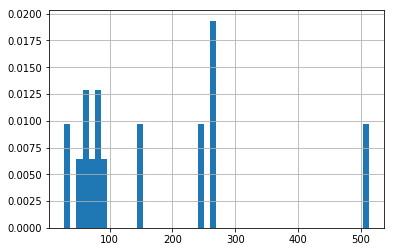

In [20]:
full_data_class_B[full_data_class_B.Embarked=='C'].Fare.hist(bins=50,density=True)

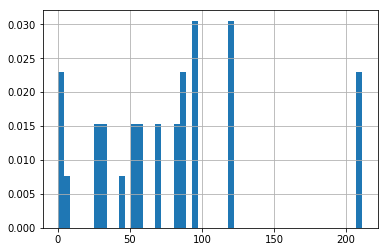

In [21]:
full_data_class_B[full_data_class_B.Embarked=='S'].Fare.hist(bins=50,density=True)

In [22]:
full_data_class_1 = full_data[(full_data['Pclass']==1) & (full_data['Fare'] < 100) & (full_data['Fare'] > 60)]

In [23]:
full_data_class_1.Embarked.value_counts()

C    39
S    33
Q     3
Name: Embarked, dtype: int64

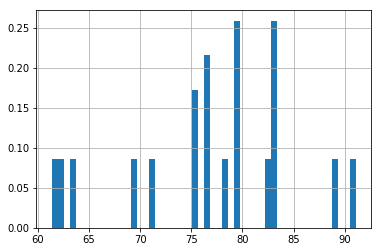

In [24]:
full_data_class_1[full_data_class_1.Embarked=='C'].Fare.hist(bins=50,density=True)

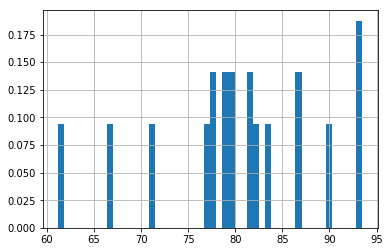

In [25]:
full_data_class_1[full_data_class_1.Embarked=='S'].Fare.hist(bins=50,density=True)

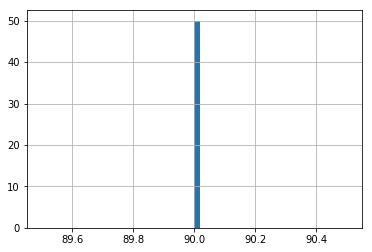

In [26]:
full_data_class_1[full_data_class_1.Embarked=='Q'].Fare.hist(bins=50,density=True)

Based on the above, it seems more likely than not that these passengers came from 'C'. Let's go ahead and insert these values.

In [27]:
print(full_data[full_data['PassengerId']==62]['Embarked'])
print(full_data[full_data['PassengerId']==830]['Embarked'])

61    NaN
Name: Embarked, dtype: object
829    NaN
Name: Embarked, dtype: object


In [28]:
full_data.index[full_data['PassengerId']==62].tolist()[0]

61

In [29]:
full_data.index[full_data['PassengerId']==830].tolist()[0]

829

In [30]:
full_data.set_value(full_data.index[full_data['PassengerId']==62].tolist()[0],'Embarked','C')
full_data.set_value(full_data.index[full_data['PassengerId']==830].tolist()[0],'Embarked','C')

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket,title,family_size,family_size_range,cabin_class
0,22.0,NaN,S,7.2500,"Braund, Mr. Owen Harris",0,1,3,male,1,0.0,A/5 21171,Mr,2,small,
1,38.0,C85,C,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,2,1,female,1,1.0,PC 17599,Mrs,2,small,C
2,26.0,NaN,S,7.9250,"Heikkinen, Miss. Laina",0,3,3,female,0,1.0,STON/O2. 3101282,Miss,1,single,
3,35.0,C123,S,53.1000,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,4,1,female,1,1.0,113803,Mrs,2,small,C
4,35.0,NaN,S,8.0500,"Allen, Mr. William Henry",0,5,3,male,0,0.0,373450,Mr,1,single,
5,NaN,NaN,Q,8.4583,"Moran, Mr. James",0,6,3,male,0,0.0,330877,Mr,1,single,
6,54.0,E46,S,51.8625,"McCarthy, Mr. Timothy J",0,7,1,male,0,0.0,17463,Mr,1,single,E
7,2.0,NaN,S,21.0750,"Palsson, Master. Gosta Leonard",1,8,3,male,3,0.0,349909,Master,5,small,
8,27.0,NaN,S,11.1333,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",2,9,3,female,0,1.0,347742,Mrs,3,small,
9,14.0,NaN,C,30.0708,"Nasser, Mrs. Nicholas (Adele Achem)",0,10,2,female,1,1.0,237736,Mrs,2,small,


In [31]:
print(full_data[full_data['PassengerId']==62]['Embarked'])
print(full_data[full_data['PassengerId']==830]['Embarked'])

61    C
Name: Embarked, dtype: object
829    C
Name: Embarked, dtype: object


Next, let's look at a passenger who does not appear to have a value for 'Fare'. This can't be right, let's go ahead and inset with median or mean for that combination of pclass and embarcation. 

In [32]:
full_data[full_data["Fare"].isnull()]

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket,title,family_size,family_size_range,cabin_class
152,60.5,NaN,S,NaN,"Storey, Mr. Thomas",0,1044,3,male,0,NaN,3701,Mr,1,single,


Let's study the distribution of fares for pclass 3 and embarcation from S.

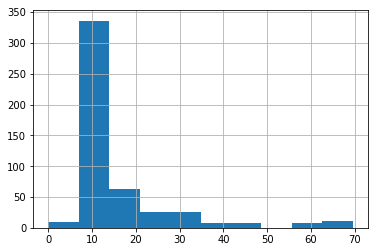

In [33]:
full_data[(full_data.Embarked=='S') & (full_data.Pclass==3)].Fare.hist(bins=10)

From the data above, median appears to be the more appropriate measure given the non-normal distribution of data.

In [34]:
full_data[(full_data.Embarked=='S') & (full_data.Pclass==3)].Fare.median()

8.05

In [35]:
full_data[full_data['PassengerId']==1044]['Fare']

152   NaN
Name: Fare, dtype: float64

In [36]:
full_data.set_value(full_data.index[full_data['PassengerId']==1044].tolist()[0],'Fare',full_data[(full_data.Embarked=='S') & (full_data.Pclass==3)].Fare.median())

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket,title,family_size,family_size_range,cabin_class
0,22.0,NaN,S,7.2500,"Braund, Mr. Owen Harris",0,1,3,male,1,0.0,A/5 21171,Mr,2,small,
1,38.0,C85,C,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,2,1,female,1,1.0,PC 17599,Mrs,2,small,C
2,26.0,NaN,S,7.9250,"Heikkinen, Miss. Laina",0,3,3,female,0,1.0,STON/O2. 3101282,Miss,1,single,
3,35.0,C123,S,53.1000,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,4,1,female,1,1.0,113803,Mrs,2,small,C
4,35.0,NaN,S,8.0500,"Allen, Mr. William Henry",0,5,3,male,0,0.0,373450,Mr,1,single,
5,NaN,NaN,Q,8.4583,"Moran, Mr. James",0,6,3,male,0,0.0,330877,Mr,1,single,
6,54.0,E46,S,51.8625,"McCarthy, Mr. Timothy J",0,7,1,male,0,0.0,17463,Mr,1,single,E
7,2.0,NaN,S,21.0750,"Palsson, Master. Gosta Leonard",1,8,3,male,3,0.0,349909,Master,5,small,
8,27.0,NaN,S,11.1333,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",2,9,3,female,0,1.0,347742,Mrs,3,small,
9,14.0,NaN,C,30.0708,"Nasser, Mrs. Nicholas (Adele Achem)",0,10,2,female,1,1.0,237736,Mrs,2,small,


In [37]:
full_data[full_data['PassengerId']==1044]['Fare']

152    8.05
Name: Fare, dtype: float64

There also appears to be a some number of missing values for 'Age'. Let's go ahead and impute this.

In [38]:
full_data['Age'].isnull().sum()

263

3 male


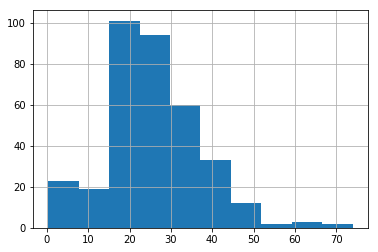

3 female


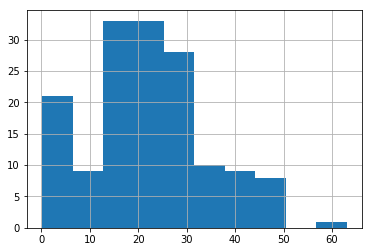

1 male


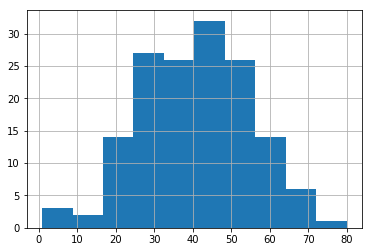

1 female


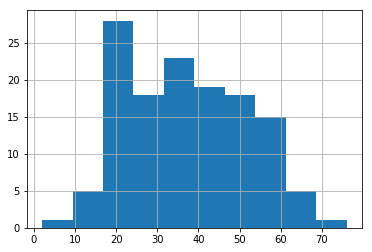

2 male


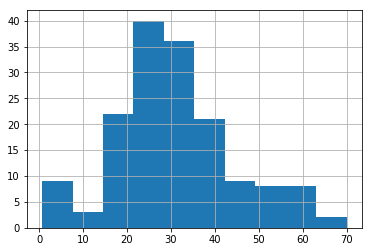

2 female


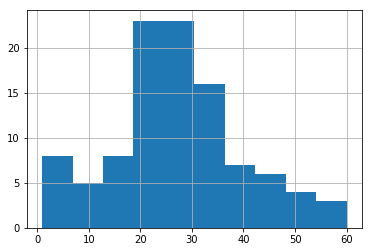

In [39]:
for pclass in full_data.Pclass.unique().tolist():
    for sex in full_data.Sex.unique().tolist():
        print(pclass,sex)
        for_age_analysis = full_data[(full_data.Sex==sex) & (full_data.Pclass==pclass)].Age
        for_age_analysis.hist(bins=10)
        plt.show()

From the above, age appears to be somewhat normal, so we can impute with mean values of age for each sex and pclass combo.

In [40]:
full_data.Age.fillna(full_data.groupby(['Sex','Pclass']).transform('mean').Age, inplace=True)
#dummy_data.head(20)

3 male


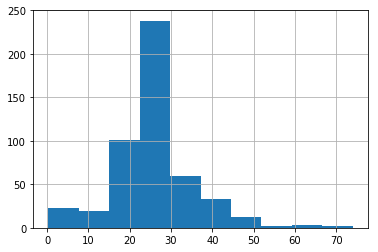

3 female


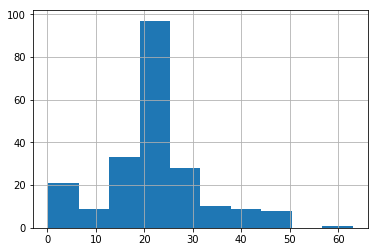

1 male


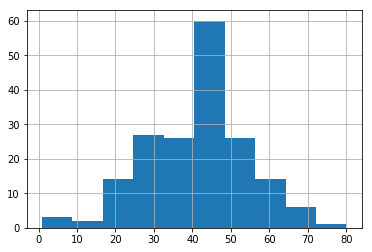

1 female


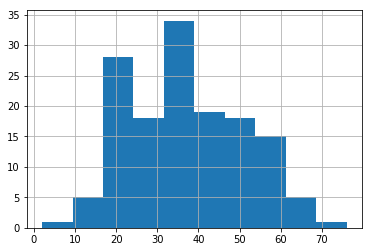

2 male


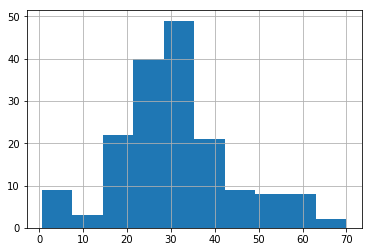

2 female


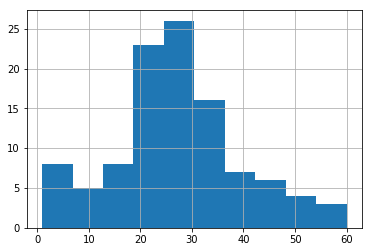

In [41]:
for pclass in full_data.Pclass.unique().tolist():
    for sex in full_data.Sex.unique().tolist():
        print(pclass,sex)
        for_age_analysis = full_data[(full_data.Sex==sex) & (full_data.Pclass==pclass)].Age
        for_age_analysis.hist(bins=10)
        plt.show()

In [42]:
full_data['Age'].isnull().sum()

0

From here, let's discretize the Age, ie child or adult.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002AB4132EEB8>]],
      dtype=object)

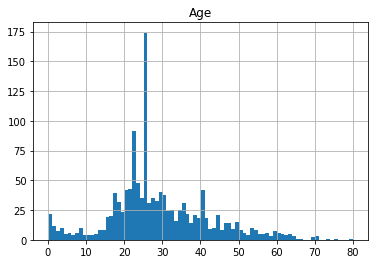

In [43]:
full_data.hist(column='Age', bins=80)

In [44]:
full_data['Age_range'] = full_data.apply(lambda row: 'Infant' if row['Age']<1 
                                         else ('Toddler' if row['Age']<4 
                                               else ('Young Child' if row['Age']<13 
                                                     else ('Teen' if row['Age']<21 
                                                           else ('Young Adult' if row['Age']<31 
                                                                 else ('Adult' if row['Age']<41
                                                                       else ('Middle Aged' if row['Age']<60 
                                                                             else 'Senior')))))),
                                         axis=1)
full_data['Age_range'].value_counts()

Young Adult    586
Adult          222
Middle Aged    212
Teen           155
Young Child     53
Senior          40
Toddler         29
Infant          12
Name: Age_range, dtype: int64

In [45]:
full_data.head()

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket,title,family_size,family_size_range,cabin_class,Age_range
0,22.0,NaN,S,7.2500,"Braund, Mr. Owen Harris",0,1,3,male,1,0.0,A/5 21171,Mr,2,small,,Young Adult
1,38.0,C85,C,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,2,1,female,1,1.0,PC 17599,Mrs,2,small,C,Adult
2,26.0,NaN,S,7.9250,"Heikkinen, Miss. Laina",0,3,3,female,0,1.0,STON/O2. 3101282,Miss,1,single,,Young Adult
3,35.0,C123,S,53.1000,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,4,1,female,1,1.0,113803,Mrs,2,small,C,Adult
4,35.0,NaN,S,8.0500,"Allen, Mr. William Henry",0,5,3,male,0,0.0,373450,Mr,1,single,,Adult


In [46]:
len(full_data)

1309

Let's go ahead and encode some features.

In [47]:
full_data = pd.get_dummies(full_data, columns=['Embarked', 'Pclass', 'Sex', 'title','family_size_range', 'Age_range'], prefix=['Embarked', 'Pclass', 'Sex', 'title', 'family_size_range', 'Age_range'])

In [48]:
len(full_data)

1309

Let's drop columns which we will not be using.

In [49]:
full_data.columns.tolist()

['Age',
 'Cabin',
 'Fare',
 'Name',
 'Parch',
 'PassengerId',
 'SibSp',
 'Survived',
 'Ticket',
 'family_size',
 'cabin_class',
 'Embarked_C',
 'Embarked_Q',
 'Embarked_S',
 'Pclass_1',
 'Pclass_2',
 'Pclass_3',
 'Sex_female',
 'Sex_male',
 'title_Dr',
 'title_Master',
 'title_Miss',
 'title_Mr',
 'title_Mrs',
 'title_Rare',
 'title_Rev',
 'family_size_range_large',
 'family_size_range_single',
 'family_size_range_small',
 'Age_range_Adult',
 'Age_range_Infant',
 'Age_range_Middle Aged',
 'Age_range_Senior',
 'Age_range_Teen',
 'Age_range_Toddler',
 'Age_range_Young Adult',
 'Age_range_Young Child']

In [50]:
columns_to_drop = ['Cabin', 'Name', 'Ticket', 'family_size','cabin_class']

In [51]:
full_data = full_data.drop(columns_to_drop,axis=1)
full_data.columns.tolist()

['Age',
 'Fare',
 'Parch',
 'PassengerId',
 'SibSp',
 'Survived',
 'Embarked_C',
 'Embarked_Q',
 'Embarked_S',
 'Pclass_1',
 'Pclass_2',
 'Pclass_3',
 'Sex_female',
 'Sex_male',
 'title_Dr',
 'title_Master',
 'title_Miss',
 'title_Mr',
 'title_Mrs',
 'title_Rare',
 'title_Rev',
 'family_size_range_large',
 'family_size_range_single',
 'family_size_range_small',
 'Age_range_Adult',
 'Age_range_Infant',
 'Age_range_Middle Aged',
 'Age_range_Senior',
 'Age_range_Teen',
 'Age_range_Toddler',
 'Age_range_Young Adult',
 'Age_range_Young Child']

Let's now also split into training and test data once again

In [52]:
len(training_data)

891

In [53]:
len(test_data)

418

In [54]:
full_data.iloc[888:898]['Survived']

888    0.0
889    1.0
890    0.0
0      NaN
1      NaN
2      NaN
3      NaN
4      NaN
5      NaN
6      NaN
Name: Survived, dtype: float64

In [55]:
training_data=full_data.iloc[:891]
training_data = training_data.drop("PassengerId",axis=1)
X_train = training_data.drop("Survived",axis=1).copy()
Y_train = training_data["Survived"].copy()

In [56]:
test_data=full_data.iloc[891:]
test_data = test_data.drop("Survived",axis=1).copy()
X_test = test_data.drop("PassengerId",axis=1).copy()

In [57]:
X_test.columns

Index(['Age', 'Fare', 'Parch', 'SibSp', 'Embarked_C', 'Embarked_Q',
       'Embarked_S', 'Pclass_1', 'Pclass_2', 'Pclass_3', 'Sex_female',
       'Sex_male', 'title_Dr', 'title_Master', 'title_Miss', 'title_Mr',
       'title_Mrs', 'title_Rare', 'title_Rev', 'family_size_range_large',
       'family_size_range_single', 'family_size_range_small',
       'Age_range_Adult', 'Age_range_Infant', 'Age_range_Middle Aged',
       'Age_range_Senior', 'Age_range_Teen', 'Age_range_Toddler',
       'Age_range_Young Adult', 'Age_range_Young Child'],
      dtype='object')

In [58]:
X_train.columns

Index(['Age', 'Fare', 'Parch', 'SibSp', 'Embarked_C', 'Embarked_Q',
       'Embarked_S', 'Pclass_1', 'Pclass_2', 'Pclass_3', 'Sex_female',
       'Sex_male', 'title_Dr', 'title_Master', 'title_Miss', 'title_Mr',
       'title_Mrs', 'title_Rare', 'title_Rev', 'family_size_range_large',
       'family_size_range_single', 'family_size_range_small',
       'Age_range_Adult', 'Age_range_Infant', 'Age_range_Middle Aged',
       'Age_range_Senior', 'Age_range_Teen', 'Age_range_Toddler',
       'Age_range_Young Adult', 'Age_range_Young Child'],
      dtype='object')

In [59]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification

C:\Users\rianashwin\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [60]:
random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train, Y_train)
Y_pred = random_forest.predict(X_test).astype(int)
random_forest.score(X_train, Y_train)
acc_random_forest = round(random_forest.score(X_train, Y_train) * 100, 2)
acc_random_forest

98.32

submission = pd.DataFrame({
        "PassengerId": test_data["PassengerId"],
        "Survived": Y_pred
    })

submission.to_csv('submission_2.csv', index=False)

In [62]:
feature_importances = pd.DataFrame(random_forest.feature_importances_,
                                   index = X_train.columns,
                                    columns=['importance']).sort_values('importance',ascending=False)

feature_importances

,importance
Fare,0.217883
Age,0.171427
Sex_male,0.098838
Sex_female,0.084918
title_Mr,0.066436
Pclass_3,0.047942
SibSp,0.034048
title_Miss,0.029483
Pclass_1,0.025847
title_Mrs,0.025810
